### Part 1

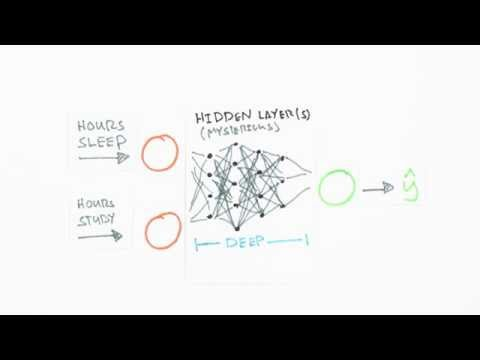

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs')

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
import numpy as np
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([0.75], [0.82], [0.93]), dtype=float)

print X.shape, y.shape

(3, 2) (3, 1)


### PART 2 - Forward Propagation

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# https://www.youtube.com/watch?v=UJwK6jAStmg
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self, z):
        # apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
# 
#     def sigmoid(x):
#         a = []
#         for item in x:
#             a.append(1/(1+math.exp(-item)))
#         return a

    


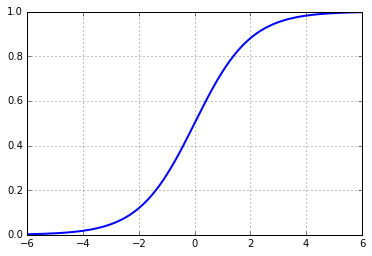

In [71]:
testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, sigmoid(testInput), linewidth=2)
grid(1)


In [72]:
sigmoid(np.random.randn(3,3))

array([[ 0.7389243 ,  0.74848726,  0.5637873 ],
       [ 0.45037753,  0.18810827,  0.89076476],
       [ 0.29875725,  0.70665577,  0.46360936]])

In [73]:
# PART 3 - Gradient Descent https://www.youtube.com/watch?v=5u0jaA3qAGk
# need to quantify how bad our predictions are with cost function

NN = Neural_Network()
print NN.W1

[[ 0.37973566  1.13819809 -0.35630715]
 [-3.70307858 -0.9795919   1.16738753]]


In [74]:
yHat = NN.forward(X)
print yHat
print yHat.shape

[[ 0.46728307]
 [ 0.33893849]
 [ 0.36101313]]
(3, 1)


In [75]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

### PART 3 - Gradient Descent

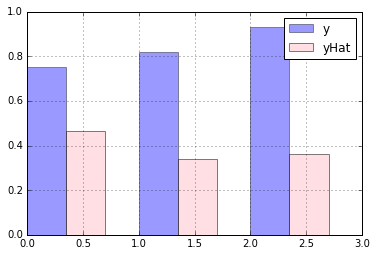

In [76]:

#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y, width = 0.35, alpha=0.4)
plt.bar([0.35,1.35,2.35],yHat, width = 0.35, color='pink', alpha=0.5)
grid(1)
legend(['y', 'yHat'])

Next step is to apply a cost function to see how inaccurate our predictions were.
--> curse of dimensionality

In [77]:
import time

weightsToTry = np.linspace(-5, 5, 1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)

endTime = time.clock()

In [78]:
timeElapsed = endTime-startTime
timeElapsed

0.03162799999999777

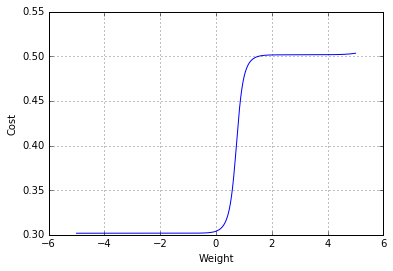

In [79]:
plt.plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

To find the rate of change of yHat with respect to z3, we need to **differentiate** our sigmoid activation function with respect to z. Our derivative should be largest where our sigmoid function is the steepest.

In [80]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

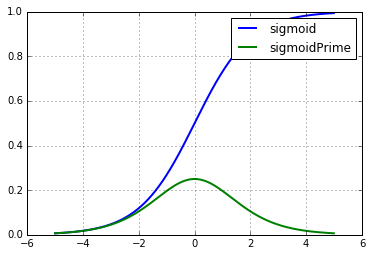

In [81]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

we can now replace dyHat/z3 with f prime(z3)

Z3 is the matrix product of our activities (a2) and our weights (W2). The activities in layer 2 are multiplied by their corresponding weights and added together to yield z3. If we focus on a single synapse, we see a simple linear relationship between W and z, where a is the slope. So for each synapse, dJdW2 is just the activation a on that synapse. 

Another way to think about the calculus here is that it is **backpropagating** an error to each weight.
The weights that contribute more to the overall error, will have larger activations, yield larger djdW2 values and will be changed **more** when we perform gradient descent.

Need to review to 4:44




In [82]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self, z):
        # apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        # gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # computer cost for given X, y, use weights already stored in class
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        # compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2
    

If we want to create a deeper neural network, we can just stack a bunch of these operations together.
How do we change our Ws to **decrease** our cost? We can now compute dJdW which tells us which way is uphill, and which is downhill.

Stochastic gradient descent
Don't need to be afraid of non-convex loss functions

In [83]:
NN= Neural_Network()
cost1 = NN.costFunctionPrime(X, y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [84]:
dJdW1


array([[-0.00057177,  0.00126286, -0.01786663],
       [-0.00080922,  0.00102649, -0.01754671]])

In [85]:
dJdW2


array([[-0.00126698],
       [-0.23670968],
       [-0.25851924]])

if we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algos are trained

In [86]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X, y)

In [87]:
print cost1, cost2

(array([[-0.00057177,  0.00126286, -0.01786663],
       [-0.00080922,  0.00102649, -0.01754671]]), array([[-0.00126698],
       [-0.23670968],
       [-0.25851924]])) 0.618839566082


### PART 5 - Numerical Gradient Checking

to ensure coded up gradients correctedly
- review derivatives


In [88]:
%pylab inline

def f(x):
    return x**2
epsilon = 1e-4
x= 1.5

numericalGradient = (f(x+epsilon)-f(x-epsilon))/(2*epsilon)

numericalGradient, 2*x

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(2.9999999999996696, 3.0)

In [93]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

we can use the same approach to numerically evaluate the gradient of our neural network. it's a little more complicated because we have 9 gradient values now, and we're interested in gradient of cost function/.
solution = test one gradient at a time, perturbing each weight, adding epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values

In [94]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [95]:
NN = Neural_Network()
numgrad = computeNumericalGradient(NN, X, y)
numgrad


array([  1.43701208e-02,  -5.94344764e-07,  -1.13739092e-03,
         2.29751507e-02,  -2.11773966e-07,  -2.45778040e-04,
         1.85854540e-02,   2.06830799e-02,   9.42641222e-04])

In [57]:
grad = NN.computeGradients(X,y)
grad

norm(grad-numgrad)/norm(grad+numgrad)

NameError: name 'numgrad' is not defined

### PART 6 - Training

Use BFGS algorithim to find 2nd order derivative, or curvature of cost

In [65]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        # make local reference to Neural Network
        self.N = N
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
    
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)

        return cost, grad
    
    
    def train(self, X, y):
        # make an internal variable for the callback function:
        self.X = X
        self.y = y
        
        # make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()
        
        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS',\
                                args=(X, y), options=options, callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res
        

In [66]:
NN = Neural_Network()

In [67]:
T = trainer(NN)

In [68]:
T.train(X, y)

ValueError: total size of new array must be unchanged